# Make 1-D particle in a 4 well potential using equation of velocity verlet 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
import math
from sympy import *

In [14]:
# functions 

def ke(v):
    return (v*v)/2

def pe(x):
    if(x<= -1.25):
        return 4*pie*pie*(x+1.25)*(x+1.25)
    if(x > -1.25 and x <= -0.25):
        return 2*(1+math.sin(2*pie*x))
    if(x > -0.25 and x <= 0.75):
        return 3*(1+math.sin(2*pie*x))
    if(x > 0.75 and x <= 1.75):
        return 4*(1+math.sin(2*pie*x))
    return 8*pie*pie*(x-1.75)*(x-1.75)

def find_acc(x):
    if(x<= -1.25):
        return -4*pie**2*(2.0*x + 2.5)
    if(x > -1.25 and x <= -0.25):
        return -4*pie*math.cos(2*pie*x)
    if(x > -0.25 and x <= 0.75):
        return -6*pie*math.cos(2*pie*x)
    if(x > 0.75 and x <= 1.75):
        return -8*pie*math.cos(2*pie*x)
    return -8*pie**2*(2.0*x - 3.5)

In [133]:
# initial conditions 
s = 1000000
t = 0.01
k = 10
vi = 4
pie = np.pi
X = np.zeros(s)
V = np.zeros(s)
H = np.zeros(s)
x1 = np.linspace(0, 1, s)
x2 = np.linspace(-3, 3, s)

# lets divide -3 to 3 in 100 windows and each time we reset the sim to random V at x0 
# -3 to 3 / 100 is each window 
# s/100 is the number of steps per window
# we start at xbase = z* 6/100 + z+1 * 6/100 - 3 
kbias = 15
nw = 100

X[0] = -3
kb = 1
T = 10
KE = 1.5*kb*T
H[0] = KE + pe(X[0])
V[0] = math.sqrt((2*(H[0] - pe(X[0]))))/20
xbase = -3 + (6/nw)

In [139]:
for i in range(s-1):
    cur_x = X[i]
    cur_v = V[i]
    if((i%(s/nw) == 0)):
        z = i/(s/nw)
        X[i] = (z*(6/nw) + (z+1)*(6/nw))/2 - 3 
        V[i] = V[0]
        xbase = X[i]
        print(z)
        print(xbase)
    a1 = find_acc(cur_x) + kbias*(xbase - cur_x)
    cur_xx = cur_x + t*cur_v + (t*t*a1)/2
    X[i+1] = cur_xx
    a2 = find_acc(cur_xx) + kbias*(xbase - cur_xx)
    cur_vv = cur_v + ((a1+a2)*t)/2
    V[i+1] = cur_vv

0.0
-2.97
1.0
-2.91
2.0
-2.85
3.0
-2.79
4.0
-2.73
5.0
-2.67
6.0
-2.61
7.0
-2.55
8.0
-2.49
9.0
-2.4299999999999997
10.0
-2.37
11.0
-2.31
12.0
-2.25
13.0
-2.19
14.0
-2.13
15.0
-2.0700000000000003
16.0
-2.01
17.0
-1.95
18.0
-1.8900000000000001
19.0
-1.83
20.0
-1.77
21.0
-1.71
22.0
-1.6500000000000001
23.0
-1.59
24.0
-1.53
25.0
-1.47
26.0
-1.4100000000000001
27.0
-1.35
28.0
-1.29
29.0
-1.23
30.0
-1.1700000000000002
31.0
-1.11
32.0
-1.05
33.0
-0.9900000000000002
34.0
-0.9299999999999997
35.0
-0.8700000000000001
36.0
-0.81
37.0
-0.75
38.0
-0.6900000000000004
39.0
-0.6299999999999999
40.0
-0.5700000000000003
41.0
-0.5099999999999998
42.0
-0.4500000000000002
43.0
-0.3900000000000001
44.0
-0.33000000000000007
45.0
-0.27000000000000046
46.0
-0.20999999999999996
47.0
-0.15000000000000036
48.0
-0.08999999999999986
49.0
-0.03000000000000025
50.0
0.03000000000000025
51.0
0.08999999999999986
52.0
0.1499999999999999
53.0
0.20999999999999996
54.0
0.2699999999999996
55.0
0.33000000000000007
56.0
0.38999

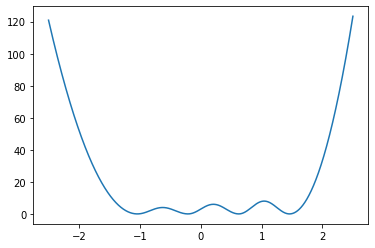

In [135]:
plt.plot(np.linspace(-2.5, 2.5, s), np.array([pe(xi) for xi in x2]))

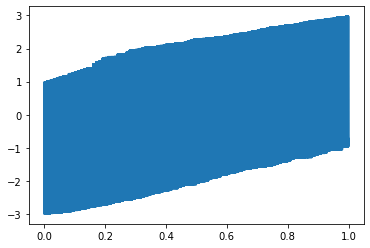

In [136]:
plt.plot(x1, X)

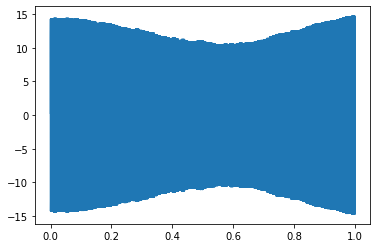

In [137]:
plt.plot(x1, V)

In [138]:
with open('readme.txt', 'w') as f:
    for i in range(s):
        f.write(str(X[i])+ '\n')